In [1]:
import sys

In [2]:
print (sys.version)

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
datafile = 'data/cosmic-array.log.combined'

In [6]:
data = pd.read_csv(open(datafile),
                   sep='\s+',
                   header=None,
                   names=['datetime','channel'],
                   dtype={'datetime': str}
                   )

In [7]:
data.head()

,datetime,channel
0,1515142282.402535,0
1,1515142326.281502,1
2,1515142336.376112,1
3,1515142352.652629,1
4,1515142356.622843,1


In [8]:
data.describe()

,channel
count,3.054697e+06
mean,9.088548e-01
std,8.522501e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,2.000000e+00


In [9]:
timestmp=pd.to_datetime(float(data.head(1).datetime), unit="s");
date_from = '{}{:02d}{:02d}'.format(timestmp.year,timestmp.month,timestmp.day)

timestmp=pd.to_datetime(float(data.tail(1).datetime), unit="s");
date_to = '{}{:02d}{:02d}'.format(timestmp.year,timestmp.month,timestmp.day)

print("Date from: ",date_from)
print("Date to:   ",date_to)

figfilename='plot-muon-counts-{}-{}.png'.format(date_from, date_to)
print("Image:     ", figfilename)

Date from:  20180105
Date to:    20190308
Image:      plot-muon-counts-20180105-20190308.png


In [10]:
bin=6                # Binsize in Hours

In [11]:
binsize=60*60*bin    # Binsize in seconds

In [12]:
binsizetext="bin size of "+str(bin)+" hours"

In [13]:
titletext="Detector Events (counts per hour, "+binsizetext+")"

In [14]:
databin = data.datetime.apply(lambda x: pd.to_datetime((float(x)//binsize)*binsize,unit='s'))

In [15]:
databincounts = databin.value_counts()

In [16]:
databinDF = pd.DataFrame(databincounts/bin)

In [17]:
databinDF.columns = ["total"]

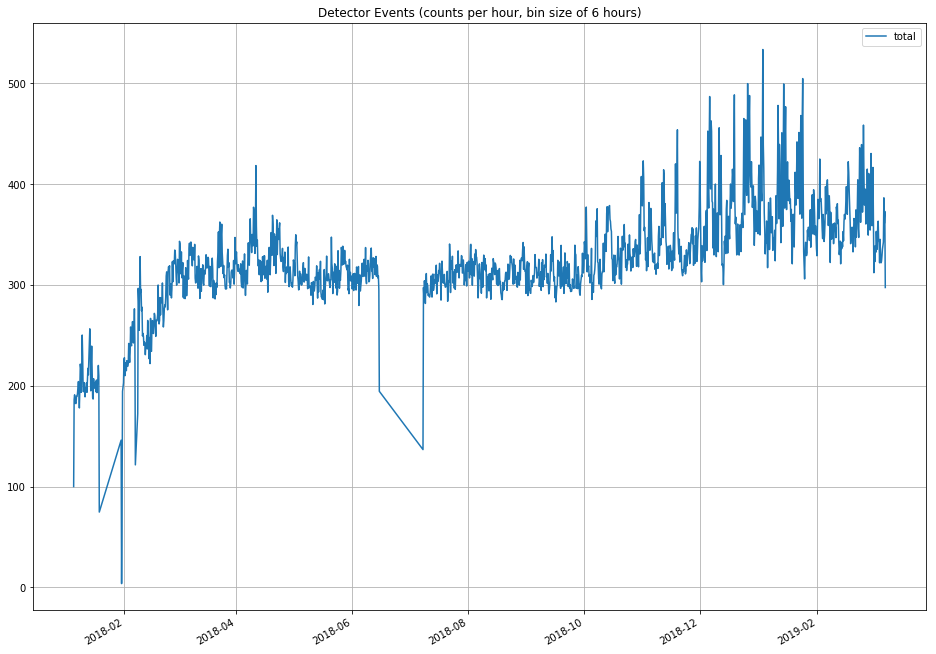

In [18]:
databinDF.plot(title=titletext,grid=True,figsize=(16,12))

In [19]:
databin0 = data.datetime[(data.channel == 0)].apply(lambda x: pd.to_datetime((float(x)//binsize)*binsize,unit='s'))

In [20]:
databin0counts = databin0.value_counts()

In [21]:
databin0DF = pd.DataFrame(databin0counts/bin)

In [22]:
databin0DF.columns = ["channel 0"]

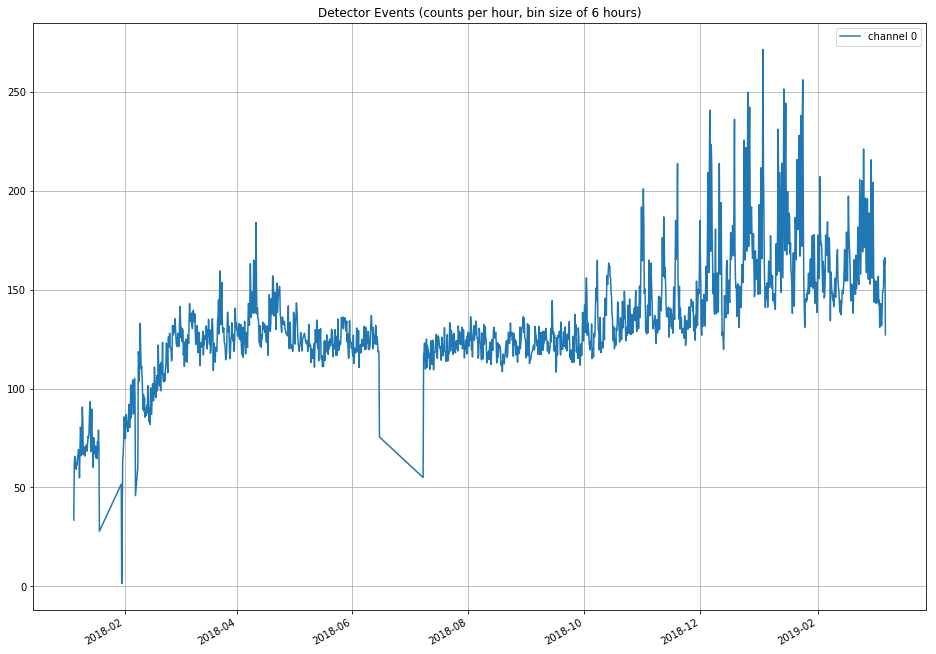

In [23]:
databin0DF.plot(title=titletext,grid=True,figsize=(16,12))

In [24]:
databin1 = data.datetime[(data.channel == 1)].apply(lambda x: pd.to_datetime((float(x)//binsize)*binsize,unit='s'))

In [25]:
databin1counts=databin1.value_counts()

In [26]:
databin1DF = pd.DataFrame(databin1counts/bin)

In [27]:
databin1DF.columns = ["channel 1"]

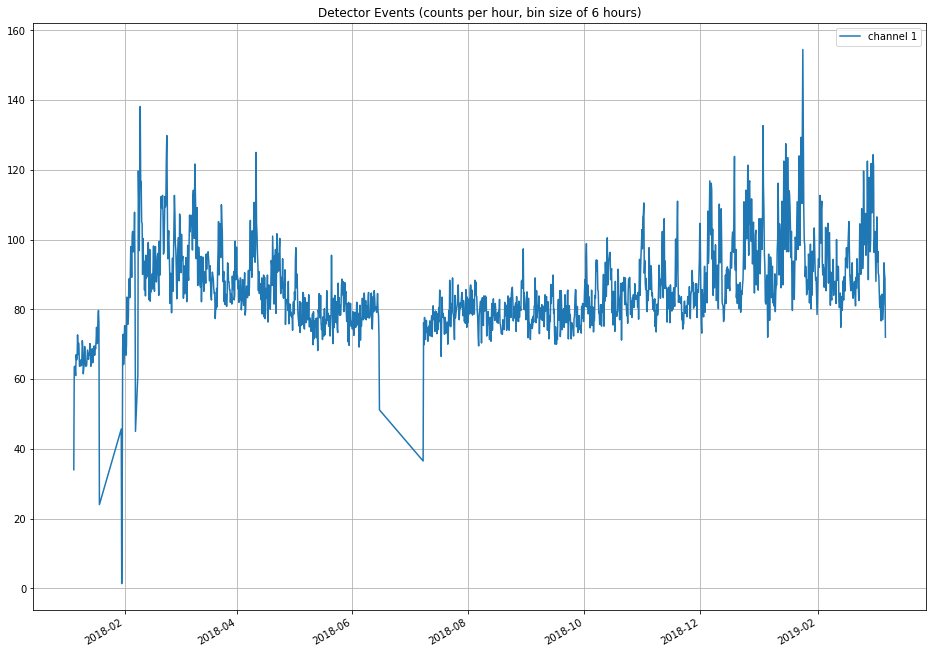

In [28]:
databin1DF.plot(title=titletext, grid=True,figsize=(16,12))

In [29]:
databin2 = data.datetime[(data.channel == 2)].apply(lambda x: pd.to_datetime((float(x)//binsize)*binsize,unit='s'))

In [30]:
databin2counts = databin2.value_counts()

In [31]:
databin2DF = pd.DataFrame(databin2counts/bin)

In [32]:
databin2DF.columns = ["channel 2"]

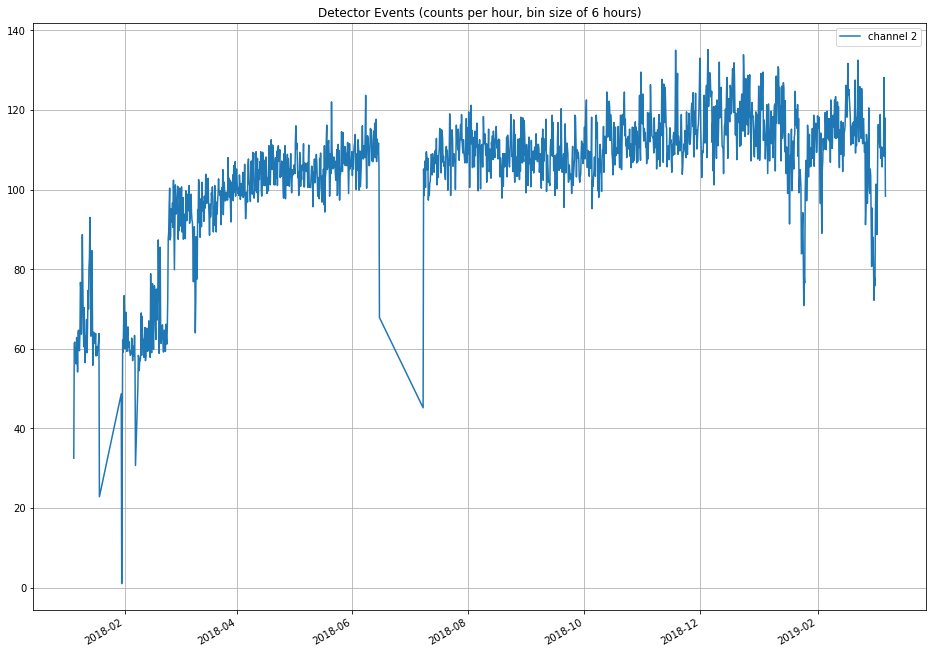

In [33]:
databin2DF.plot(title=titletext,grid=True,figsize=(16,12))

In [34]:
databin2DF.head(2)

,channel 2
2018-12-05 06:00:00,135.166667
2018-11-18 06:00:00,135.000000


In [35]:
datacombined=pd.concat([databinDF,databin0DF,databin1DF,databin2DF], axis=1)

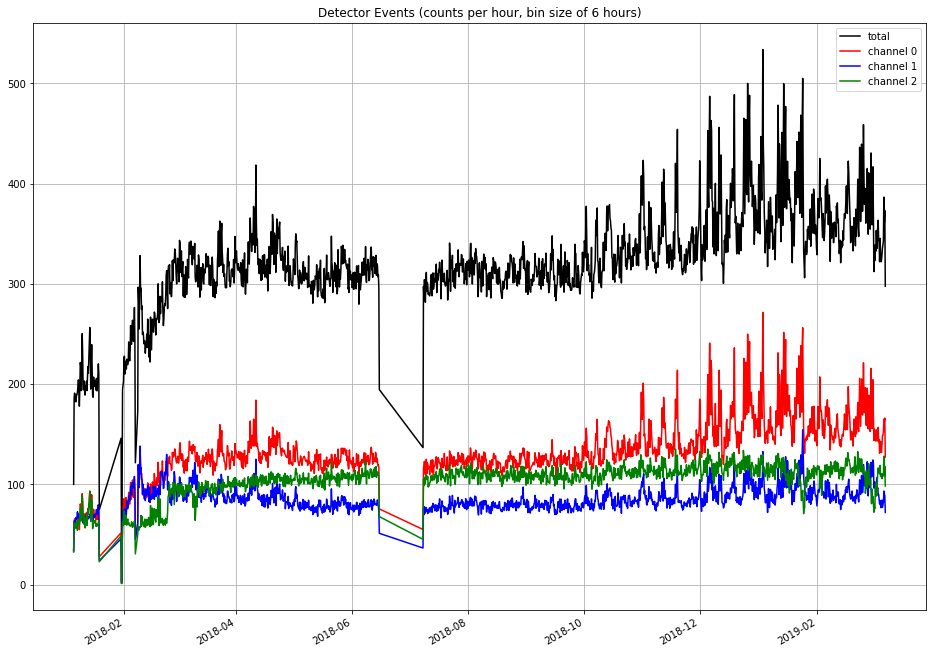

In [36]:
# The "green" and "blue" channels have been swapped in the graph below 
# match the channels in the detector, which had wires crossed in this way.
datacombined.plot(title=titletext, 
                  grid=True, 
                  figsize=(16,12),
                  color=["black","red","blue","green"])
plt.savefig(figfilename)
plt.savefig("plot-muon-counts.png")

<p>
    <img src="cosmic-array-channels.jpg" width="300" align="left"/>
</p>